<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [6]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-11-707587c218af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=diamonds, x="cut", y="price", errorbar=None, palette="pastel")


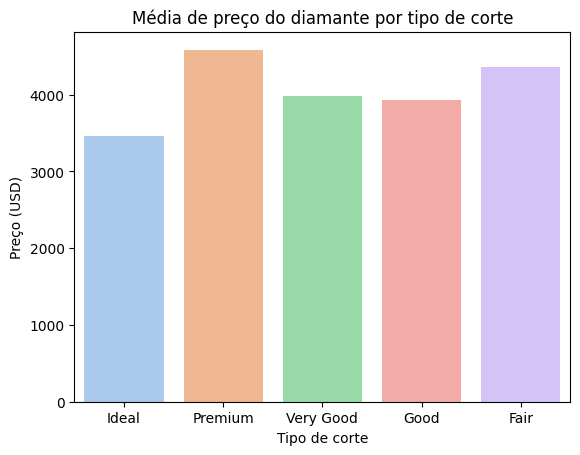

In [11]:
# gráfico do exercício 1

diamonds =  data[["cut", "price"]].groupby("cut").agg("mean").reset_index()

grafico = sns.barplot(data=diamonds, x="cut", y="price", errorbar=None, palette="pastel")
grafico.set(title='Média de preço do diamante por tipo de corte', xlabel='Tipo de corte', ylabel='Preço (USD)');

**Insight do gráfico 1**:

De acordo com o gráfico, podemos notar que os diamantes do tipo "Premium" são os que apresentam maior média de preços.

Em contrapartida, os diamantes da categoria "Ideal" são os que apresentam a menor média de preço, isto é, um menor custo.

Além disso, a média de preço é bem próxima entre os tipos de corte "Good" e "Very Good".

Como os valores não são tão discrepantes, no geral, não podemos assumir que o tipo de corte está totalmete relacionado ao preço.

---

## 2\. Número de passageiros em dezembro por ano

In [12]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [22]:
# gráfico do exercício 2

flights = data.query('month == "Dec"')

flights = flights[["year", "passengers"]].groupby("year").agg("sum").reset_index()
flights.head()

,year,passengers
0,1949,118
1,1950,140
2,1951,166
3,1952,194
4,1953,201


<ipython-input-25-ee6ca809b3ea>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=flights, x="year", y="passengers", palette="pastel")


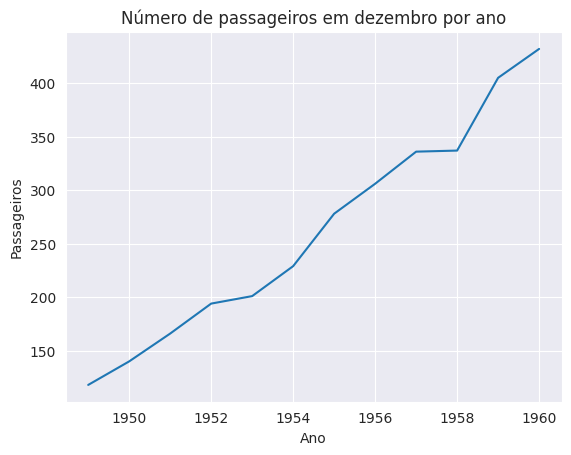

In [25]:
with sns.axes_style('darkgrid'):

  grafico = sns.lineplot(data=flights, x="year", y="passengers", palette="pastel")
  grafico.set(title='Número de passageiros em dezembro por ano', xlabel='Ano', ylabel='Passageiros');

**Insight do gráfico 2**:

Podemos observar que, ao longo dos anos, o número de passageiros aumentou consideravelmente, tendo uma pausa apenas entre meados de 1957 e 1958.

Observamos também que em nenhum ano houve queda no número de passageiros.

O maior crescimento foi dado entre os anos de 1958 e 1960.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [28]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


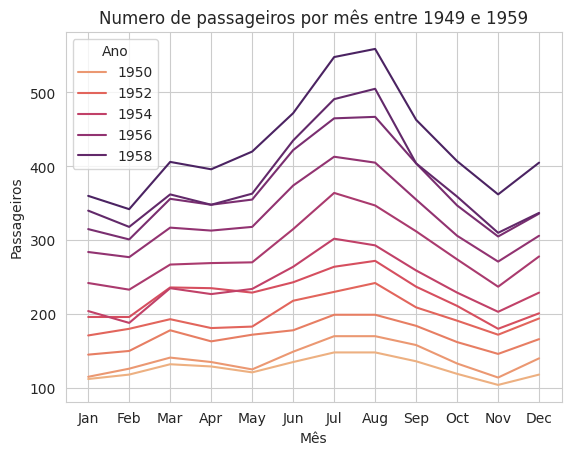

In [30]:
# gráfico do exercício 3

flights = data.query("1949 <= year < 1960")

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="flare")
  grafico.set(title='Numero de passageiros por mês entre 1949 e 1959', xlabel='Mês', ylabel='Passageiros');
  grafico.get_legend().set_title("Ano");

**Insight do gráfico 3**:

Pelo gráfico, observamos que o número de passageiros ao longos dos meses é similar ao longo dos anos, o que significa que, com o passar do tempo, a tendência dos meses de alta e de baixa não se alterou.

Apesar de a tendência não ter se alterado, a quatindade de passageiros variou bastante. Ao longo dos anos, a quantidade de passageiros foi aumentando consideravelmente, sendo quase sempre maior do que no ano anterior.

---